# Second model - Polish Dataset

## Libraries

In [1]:
!pip install transformers
!pip install -q pyyaml h5py
!pip install siuba
import pandas as pd
from transformers import *
import numpy as np
from sklearn.model_selection import train_test_split
from siuba.dply.forcats import fct_lump, fct_reorder


     |████████████████████████████████| 645kB 4.9MB/s 
     |████████████████████████████████| 890kB 21.8MB/s 
     |████████████████████████████████| 1.0MB 31.9MB/s 
     |████████████████████████████████| 3.8MB 48.9MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=9da3d1632cd5e39b730b9f591f411407eed30550603831e4a53bdd550829119c
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
     |████████████████████████████████| 102kB 3.1MB/s 


## Data Preprocessing

*   Reading data
*   Change columns names
*   Drop NaN rows
*   Fill others NaN values by special sign

In [2]:
df = pd.read_excel('polishOriginalDataset.xlsx')
df.reset_index()
df = df.iloc[:,[6,8,9,10,15,16,19,21,5]]
df.columns = [
              "type_of_sentence",
              "verb_main_semantic_class",
              "verb_second_semantic_class",
              "verb_third_semantic_class",
              "verb_veridical_positive",
              "verb_veridical_negative",
              "verb_tense",
              "t_negation",
              "semantic_relation"
              ]
df.dropna(inplace=True, axis = 0, how = 'all')
df.fillna(axis = 0, inplace =True, value="none")
df.head()

,type_of_sentence,verb_main_semantic_class,verb_second_semantic_class,verb_third_semantic_class,verb_veridical_positive,verb_veridical_negative,verb_tense,t_negation,semantic_relation
0,eliptyczne,mówienia,none,none,o?,?,brak,0,N
1,eliptyczne,epistemiczny,none,none,?,?,past,0,?
2,eliptyczne,mówienia,none,none,?,?,past,0,N
3,1,epistemiczny,percepcyjny,none,"""+""","""+""",past,0,N
4,1,epistemiczny,percepcyjny,none,o,o,present,0,N


### Cleaning data by deleting uncertainty - simplification 

In [3]:
# df.type_of_sentence.unique() cleaning 
df.verb_main_semantic_class = fct_lump(df.verb_main_semantic_class, n=3, other_level="?")

# df.verb_second_semantic_class.unique() cleaning 
df.verb_second_semantic_class = fct_lump(df.verb_second_semantic_class, n=3, other_level="?")

# df.verb_third_semantic_class.unique() cleaning 
df.verb_third_semantic_class = fct_lump(df.verb_third_semantic_class, n=3, other_level="?")

# verb veridical positive cleaning
df.verb_veridical_positive = df.verb_veridical_positive.apply(lambda x: '+' if '+' in x else x)
df.verb_veridical_positive = df.verb_veridical_positive.apply(lambda x: '-' if '-' in x else x)
df.verb_veridical_positive = df.verb_veridical_positive.apply(lambda x: 'o' if 'o' in x else x)
df.verb_veridical_positive = df.verb_veridical_positive.apply(lambda x: '?' if '?' in x else x)

# verb veridical negative cleaning
df.verb_veridical_negative = df.verb_veridical_negative.apply(lambda x: '+' if '+' in x else x)
df.verb_veridical_negative = df.verb_veridical_negative.apply(lambda x: 'o' if 'o' in x else x)
df.verb_veridical_negative = df.verb_veridical_negative.apply(lambda x: '-' if '-' in x else x)
df.verb_veridical_negative = df.verb_veridical_negative.apply(lambda x: '?' if '?' in x else x)

# df.verb_tense.unique() cleaning not needed
# df.t_negation.unique() cleaning not needed
# df.semantic_relation.unique() cleaning not needed 

df.head()

,type_of_sentence,verb_main_semantic_class,verb_second_semantic_class,verb_third_semantic_class,verb_veridical_positive,verb_veridical_negative,verb_tense,t_negation,semantic_relation
0,eliptyczne,mówienia,none,none,o,?,brak,0,N
1,eliptyczne,epistemiczny,none,none,?,?,past,0,?
2,eliptyczne,mówienia,none,none,?,?,past,0,N
3,1,epistemiczny,?,none,+,+,past,0,N
4,1,epistemiczny,?,none,o,o,present,0,N


### Possible feature values

In [4]:
print(df.type_of_sentence.unique())
print(df.verb_main_semantic_class.unique())
print(df.verb_second_semantic_class.unique())
print(df.verb_third_semantic_class.unique())
print(df.verb_veridical_positive.unique())
print(df.verb_veridical_negative.unique())
print(df.verb_tense.unique())
print(df.t_negation.unique())


['eliptyczne' 1 'generalne' 'pytajne' 'modalne'
 'powtarzające się zdarzenie' 'warunkowe' 'powinnościowe'
 'imperatyw; warunkowe' 'none' '?' 'imperatyw ' 'modal'
 'warunkowe; pytajne' 'wolitywne' 'performatyw' 'kontrfaktyczne'
 'imperatyw' 'prostujące' 'korygujące' 'performatyw; warunkowe'
 'warunkowe; modalne' 'przypuszczające' 'wolitywne; performatyw'
 'modalne; pytajne' 'imperatyw; generalne' 'sprostowanie' 'dyspozycyjne'
 'modalne; warunkowe' 'pytajne; modalne' 'modalne; alternatywa'
 'alternatywa' 'warunkowe; generalne']
[mówienia, epistemiczny, ?, odkrycia]
Categories (4, object): [mówienia, epistemiczny, ?, odkrycia]
[none, ?, epistemiczny, wolicjonalny]
Categories (4, object): [none, ?, epistemiczny, wolicjonalny]
[none, mówienia, ?, epistemiczny]
Categories (4, object): [none, mówienia, ?, epistemiczny]
['o' '?' '+' '-']
['?' '+' 'o' '-']
['brak' 'past' 'present' 'future']
[0 1]


In [5]:
df.verb_main_semantic_class.value_counts()

epistemiczny    1079
mówienia         973
?                448
odkrycia          96
Name: verb_main_semantic_class, dtype: int64

In [0]:
# choose columns 
df = df[[
  "verb_main_semantic_class",
  "verb_second_semantic_class",
 # "verb_third_semantic_class",
  "verb_veridical_positive",
  "verb_veridical_negative",
  "verb_tense",
  "semantic_relation"      
]]
df.to_csv("plData.csv", index=False)

### Vactorize data and split to features and target

Ml classifier labels - target for RandomForest

In [0]:
ml_classifier_labels = df["semantic_relation"]

#### Vectorize (one =hot encoding)

In [0]:
df = pd.get_dummies(df)

#### Split to features and target

In [0]:
X = df.iloc[:,0:-4]
y = df.iloc[:,-4:]

#### Features columns

In [10]:
X.columns

Index(['verb_main_semantic_class_?', 'verb_main_semantic_class_epistemiczny',
       'verb_main_semantic_class_mówienia',
       'verb_main_semantic_class_odkrycia', 'verb_second_semantic_class_?',
       'verb_second_semantic_class_epistemiczny',
       'verb_second_semantic_class_none',
       'verb_second_semantic_class_wolicjonalny', 'verb_veridical_positive_+',
       'verb_veridical_positive_-', 'verb_veridical_positive_?',
       'verb_veridical_positive_o', 'verb_veridical_negative_+',
       'verb_veridical_negative_-', 'verb_veridical_negative_?',
       'verb_veridical_negative_o', 'verb_tense_brak', 'verb_tense_future',
       'verb_tense_past', 'verb_tense_present'],
      dtype='object')

#### Target columns

In [11]:
y.columns

Index(['semantic_relation_?', 'semantic_relation_C', 'semantic_relation_E',
       'semantic_relation_N'],
      dtype='object')

### k-fold crossvalidation preparing

In [0]:
k=7
from sklearn.model_selection import KFold
kfold = KFold(n_splits = k, shuffle=True)

acc_per_fold = []
loss_per_fold = [] 

***
# Keras model building

### Model training

In [0]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix 
import seaborn as sns

It takes only 1-2 minutes to train this model with 7-crossvalidation.

In [14]:
fold_no = 1 

#get number of columns in training data
n_cols = X.shape[1]
print(n_cols)

for train, test in kfold.split(X,y):
  # FOLD PRINTOUT
  print(100*'_')
  print (f"FOLD NO {fold_no} START")  

  # model architecture  
  model = tf.keras.Sequential()
  model.add(Dense(16, activation='relu', input_shape=(n_cols,)))
  model.add(tf.keras.layers.Dropout(rate=0.4))
  model.add(Dense(32, activation='relu'))
  model.add(tf.keras.layers.Dropout(rate=0.4))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(4, activation='softmax'))

  # model compile 
  model.compile(optimizer = 'adam', loss="categorical_crossentropy", metrics = ['accuracy'])
  
  # training
  history = model.fit(X.iloc[train], y.iloc[train], validation_split=0.2, epochs=70)

  # scores 
  scores = model.evaluate(X.iloc[test], y.iloc[test], verbose=0)
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # iterator up
  fold_no = fold_no + 1

20
____________________________________________________________________________________________________
FOLD NO 1 START
Epoch 1/70
56/56 [==============================] - 0s 5ms/step - loss: 1.2206 - accuracy: 0.4416 - val_loss: 1.0390 - val_accuracy: 0.5640
Epoch 2/70
56/56 [==============================] - 0s 2ms/step - loss: 0.8893 - accuracy: 0.6522 - val_loss: 0.7619 - val_accuracy: 0.6719
Epoch 3/70
56/56 [==============================] - 0s 3ms/step - loss: 0.7207 - accuracy: 0.7680 - val_loss: 0.5530 - val_accuracy: 0.8764
Epoch 4/70
56/56 [==============================] - 0s 2ms/step - loss: 0.6527 - accuracy: 0.8135 - val_loss: 0.4707 - val_accuracy: 0.8831
Epoch 5/70
56/56 [==============================] - 0s 2ms/step - loss: 0.6005 - accuracy: 0.8242 - val_loss: 0.4536 - val_accuracy: 0.8831
Epoch 6/70
56/56 [==============================] - 0s 2ms/step - loss: 0.5946 - accuracy: 0.8427 - val_loss: 0.4476 - val_accuracy: 0.8831
Epoch 7/70
56/56 [======================

### Scores

In [15]:
# == Provide average scores ==
print('Score per fold:')
for i in range(0, len(acc_per_fold)):
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Score per fold:
> Fold 1 - Loss: 0.5186271071434021 - Accuracy: 85.44474244117737%
> Fold 2 - Loss: 0.5082710981369019 - Accuracy: 85.98382472991943%
> Fold 3 - Loss: 0.41896623373031616 - Accuracy: 88.40970396995544%
> Fold 4 - Loss: 0.5098980069160461 - Accuracy: 86.52291297912598%
> Fold 5 - Loss: 0.4092913866043091 - Accuracy: 87.87062168121338%
> Fold 6 - Loss: 0.39911746978759766 - Accuracy: 88.94878625869751%
> Fold 7 - Loss: 0.3293522894382477 - Accuracy: 92.43243336677551%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 87.94471791812352 (+- 2.1871688884678027)
> Loss: 0.4419319416795458
------------------------------------------------------------------------


## Plot with train and test accuracy

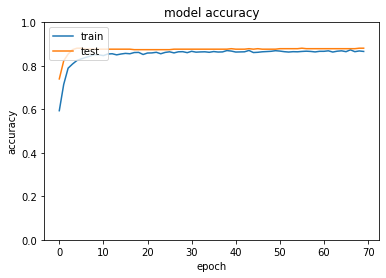

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim(0,1)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

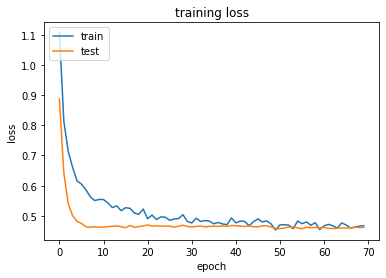

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Confusion matrix 

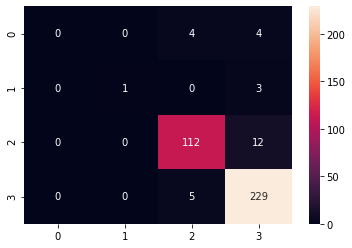

In [24]:
X_conf_matrix = X.iloc[test]
y_conf_matrix = y.iloc[test]
predicted_conf_matrix = model.predict_classes(X_conf_matrix)

conf_matrix = confusion_matrix(y_conf_matrix.values.argmax(axis=1), predicted_conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt="d")

### Save model 


In [0]:
model.save('featureModelPl.h5')

## Check RANDOM FOREST Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
random_forest = RandomForestClassifier(
    n_estimators = 2000, 
)

In [33]:
 X_train, X_test, y_train, y_test = train_test_split(X, ml_classifier_labels, test_size=0.33, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=2000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

(857,)
['C' 'E' 'N']
(857,)
(array(['?', 'C', 'E', 'N'], dtype=object), array([ 30,  21, 240, 566]))


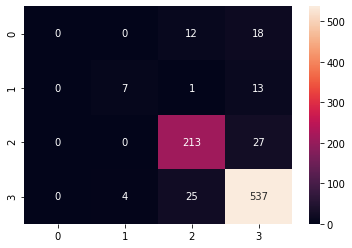

In [29]:
predict = random_forest.predict(X_test)
print(predict.shape)
print(np.unique(predict))
print(y_test.shape)
print(np.unique(y_test, return_counts = True))
conf_matrix = confusion_matrix(y_test, predict)
sns.heatmap(conf_matrix, annot=True, fmt="d")

In [30]:
random_forest.score(X_test, y_test)

0.8833138856476079